## Importing modules

In [1]:
##ConvLSTM
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras as k
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from numpy import float32
from dataset import ClimateHackDataset
import torch.optim as optim
from torch.utils.data import DataLoader
import torch as pt
import torchvision as tv
#from loss import MS_SSIMLoss
#from functools import partial

In [11]:
class DataGenerator(k.utils.Sequence):
    def __init__(self, gen, ncl):
        self.gen = gen
        self.iter = iter(gen)
        self.ncl = ncl

    def __getitem__(self, _):
        try:
            coordinates, features, labels = next(self.iter)
#             for time in len(times):
#                 res = convert_lonlat(coordinates[time][0][64], coordinates[time][1][64])
#                 lat, lon = res[1], res[0]
#                 solpos = solarposition.get_solarposition(current_time, lat, lon)
#                 if 90-solpos.apparent_zenith < 10:
#                     continue
#                 else:
#                     features1.append()
        except StopIteration:
            self.iter = iter(self.gen)
            coordinates, features, labels = next(self.iter)
        
        
        #features = np.swapaxes(np.swapaxes(features.numpy(), 1, 2), 1, 2)
        #labels = np.eye(self.ncl)[labels].reshape(8, self.ncl)
        #Expanding dimensions of our features and labels
        #features = np.expand_dims(features, -1)
        #labels = np.expand_dims(labels, -1)
        
        #Images = features[:, 0, :, :, :]
        # Resizing images to 64x64
        #X = tf.image.resize_with_crop_or_pad(Images, 64, 64)#Images[32:96, 32:96]
        # Expanding dimensions
        #X = np.expand_dims(X, axis = 1)
        #X = X/1023
        
        return features, labels

    def __len__(self):
        return 1000 #len(list(self.gen))

In [2]:
SATELLITE_ZARR_PATH = "gs://public-datasets-eumetsat-solar-forecasting/satellite/EUMETSAT/SEVIRI_RSS/v3/eumetsat_seviri_hrv_uk.zarr"

dataset = xr.open_dataset(
    SATELLITE_ZARR_PATH, 
    engine="zarr",
    chunks={},  # Load the data as a Dask array
)

In [3]:
from OSGridConverter import grid2latlong
from os_grid_reference import ngr_encode
from numpy import float64

In [27]:
ngr_encode.tile_1m(subset.x_osgb[10][0].values, subset.y_osgb[10][0].values)

'TW5368397071'

In [63]:
l=grid2latlong(ngr_encode.tile_1m(subset.x_osgb[1][0].values, subset.y_osgb[1][0].values))

In [65]:
print(l)

+50.55353:+1.62682


In [7]:
from bng_latlon import OSGB36toWGS84

In [8]:
lat, lon = OSGB36toWGS84(subset.x_osgb[1][0].values, subset.y_osgb[1][0].values)

50.553527

In [36]:
import pandas as pd
from pvlib import solarposition

In [68]:
import pyproj

In [73]:
crs_british = pyproj.Proj(init='EPSG:27700')
crs_wgs84 = pyproj.Proj(init='EPSG:4326')

long, lat = pyproj.transform(crs_british, crs_wgs84, 656741.9, 78910.05)
print(long, lat)

1.6232296895558738 50.553527323190686


C:\Users\james\anaconda3\envs\climatehack\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\james\anaconda3\envs\climatehack\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\james\AppData\Local\Temp/ipykernel_13764/86519252.py:4: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-p

In [71]:
subset.y_osgb[1][0].values

array(78910.05, dtype=float32)

In [66]:
lat, lon = subset.y[1].values, subset.x[1].values+118.31695
times = subset.time[0].values
solpos = solarposition.get_solarposition(times, lat, lon)
print(solpos.apparent_elevation)

lat, lon = 1.62682, 50.55353
solpos = solarposition.get_solarposition(times, lat, lon)
print(solpos.apparent_elevation)
lat, lon = 1.623205, 50.553527
solpos = solarposition.get_solarposition(times, lat, lon)
print(solpos.apparent_elevation)

2020-01-01 00:05:00   -37.435063
Name: apparent_elevation, dtype: float64
2020-01-01 00:05:00   -36.125631
Name: apparent_elevation, dtype: float64
2020-01-01 00:05:00   -36.123955
Name: apparent_elevation, dtype: float64


In [4]:
data_array = dataset['data']

In [5]:
from datetime import datetime
from random import randrange

In [5]:
# rand_x = randrange(550, 950 - 128)
# rand_y = randrange(375, 700 - 128)
subset = (
    # Select a time slice using 'sel' (short for 'select').
    data_array.isel(
            x=slice(550, 950),
            y=slice(375, 700),
        )
)

In [297]:
subset1['data'].values

KeyError: 'data'

In [257]:
pd.DatetimeIndex(subset["time"])

DatetimeIndex(['2020-01-01 00:05:00', '2020-01-01 00:10:00',
               '2020-01-01 00:15:00', '2020-01-01 00:20:00',
               '2020-01-01 00:25:00', '2020-01-01 00:30:00',
               '2020-01-01 00:35:00', '2020-01-01 00:40:00',
               '2020-01-01 00:45:00', '2020-01-01 00:50:00',
               ...
               '2021-11-07 15:05:00', '2021-11-07 15:10:00',
               '2021-11-07 15:15:00', '2021-11-07 15:20:00',
               '2021-11-07 15:25:00', '2021-11-07 15:30:00',
               '2021-11-07 15:35:00', '2021-11-07 15:40:00',
               '2021-11-07 15:45:00', '2021-11-07 15:50:00'],
              dtype='datetime64[ns]', length=173624, freq=None)

In [7]:
from OSGridConverter import grid2latlong
from numpy import float64

In [8]:
import pandas as pd
from pvlib import solarposition

In [32]:
selection = input_slice.isel(
            x=slice(rand_x, rand_x + 128),
            y=slice(rand_y, rand_y + 128),
        )

09:00:00


In [279]:
#res_list_en = convert_lonlat(osgb_data[0], osgb_data[1])
lat, lon = subset.y[0].values, subset.x[0].values
times = pd.DatetimeIndex(subset.time.values)
solpos = solarposition.get_solarposition(times, lat, lon)

In [285]:
lat, lon = subset.y[0].values, subset.x[399].values
times = pd.DatetimeIndex(subset.time.values)
solpos = solarposition.get_solarposition(times, lat, lon)
solpos = solpos.loc[solpos['apparent_elevation'] >= 10, :]
subset= subset[np.in1d(subset.time.values, solpos.index)]

In [286]:
lat, lon = subset.y[324].values, subset.x[399].values
times = pd.DatetimeIndex(subset.time.values)
solpos = solarposition.get_solarposition(times, lat, lon)
solpos = solpos.loc[solpos['apparent_elevation'] >= 10, :]
subset= subset[np.in1d(subset.time.values, solpos.index)]

In [287]:
lat, lon = subset.y[324].values, subset.x[0].values
times = pd.DatetimeIndex(subset.time.values)
solpos = solarposition.get_solarposition(times, lat, lon)
solpos = solpos.loc[solpos['apparent_elevation'] >= 10, :]
subset= subset[np.in1d(subset.time.values, solpos.index)]

In [292]:
subset

<xarray.DataArray 'data' (time: 6304, y: 325, x: 400)>
dask.array<getitem, shape=(6304, 325, 400), dtype=int16, chunksize=(1, 325, 400), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T00:05:00 ... 2021-11-07T10:35:00
  * x        (x) float32 -5.221e+05 -5.231e+05 ... -9.201e+05 -9.211e+05
    x_osgb   (y, x) float32 dask.array<chunksize=(325, 400), meta=np.ndarray>
  * y        (y) float32 4.573e+06 4.574e+06 4.575e+06 ... 4.896e+06 4.897e+06
    y_osgb   (y, x) float32 dask.array<chunksize=(325, 400), meta=np.ndarray>
Attributes:
    _satpy_id:                              !!python/object/apply:satpy.datas...
    ancillary_variables:                    []
    area:                                   msg_seviri_rss_1km:\n  descriptio...
    calibration:                            reflectance
    coordinates:                            acq_time
    georef_offset_corrected:                True
    modifiers:                              []
    name:                                   HRV
    orbital_parameters:                     projection_altitude: 35785831.0\n...
    platform_name:                          Meteosat-10
    reader:                                 seviri_l1b_native
    resolution:                             1000.134348869
    sensor:                                 seviri
    standard_name:                          toa_bidirectional_reflectance
    sun_earth_distance_correction_applied:  True
    sun_earth_distance_correction_factor:   1.0282367454433767
    wavelength:                             [0.5, 0.7, 0.9, 'µm']

In [280]:
solpos = solpos.loc[solpos['apparent_elevation'] >= 10, :]

In [158]:
len(solpos.index)

85532

In [150]:
print(solpos.index[0], 'and', subset.time[0].values)

2020-01-01 06:40:00 and 2020-01-01T00:05:00.000000000


In [281]:
np.count_nonzero(np.in1d(subset.time.values, solpos.index))

42177

In [282]:
subset= subset[np.in1d(subset.time.values, solpos.index)]

In [235]:
subset.time[1547].values

numpy.datetime64('2020-01-06T09:00:00.000000000')

In [226]:
solpos.index[1500]

Timestamp('2020-01-12 08:30:00')

In [228]:
data.time[701].values

numpy.datetime64('2020-01-06T09:00:00.000000000')

In [211]:
solpos.index[702]

Timestamp('2020-01-06 09:05:00')

In [14]:
BATCH_SIZE = 8
EPOCHS = 6

ch_dataset = ClimateHackDataset(dataset, crops_per_slice=2)
ch_dataloader = DataLoader(ch_dataset, batch_size=BATCH_SIZE)
dataloader = DataGenerator(ch_dataloader, 2) # ncl represents the number of classes for the model

In [ ]:
x, y, z = next(iter(ch_dataloader))
len(y)
len(y[0])
len(y[0][0])
len(y[0][0][0])

In [66]:
x[0][1][1][1]

tensor(99290.2109)

In [60]:
# Loading sample image
img = y[1]

# Resizing and normalizing image
img = np.expand_dims(tf.image.resize_with_crop_or_pad(img, 64, 64), axis = 0) / 1023

In [289]:
ims = np.swapaxes(np.swapaxes(y.numpy(), 1, 3), 1, 2)

NameError: name 'y' is not defined

In [26]:
img= np.squeeze(img, -1)
img= np.expand_dims(img, -1)


(1, 1, 64, 64, 1)


In [ ]:
x = layers.ConvLSTM2D(filters=64,
    kernel_size=(5, 5), padding="same", return_sequences=True, activation="relu",)(img)
print(x.shape)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(filters=64,
    kernel_size=(3, 3), padding="same", return_sequences=True, activation="relu",)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(filters=64, 
    kernel_size=(1, 1), padding="same", return_sequences=True, activation="relu",)(x)
#x = layers.BatchNormalization()(x)

x = layers.Conv3D(filters=1, 
    kernel_size=(3, 3, 3), activation="sigmoid", padding="same")(x) * 1023
print(x.shape)
x=np.squeeze(np.squeeze(x, axis = 0), axis = 0)
plt.imshow(x)

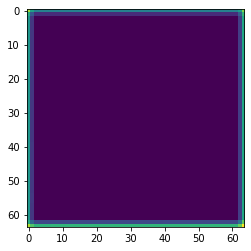

In [10]:
#model = tf.keras.models.load_model('submission/saved_model/my_model')
pred = model.predict(img)
pred = np.squeeze(np.squeeze(pred, axis = 0), axis = 0)
plt.imshow(pred)

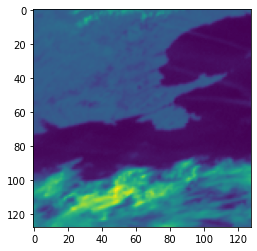

In [61]:
plt.imshow(y[1][0])

## Submitting your model to DOXA

```bash
$ python doxa_cli.py user login
```


```bash
$ python doxa_cli.py agent upload climatehack ./submission
```